In [1]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2022-06-04 18:03:38--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 172.253.123.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2022-06-04 18:03:39 (110 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [2]:
import json

#load the JSON file
with open('./sarcasm.json', 'r') as f:
  datastore = json.load(f)

#Initialize the lists
sentences = []
labels = []

#Collect sentences and labels into the lists
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])


##Split the dataset

In [8]:
training_size = 20000

#Split the sentences and labels 
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]

training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

##Data Preprocessing

In [9]:
import numpy as np 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

#Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)

#generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

#generate and pad the training and testing sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)


#Convert labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [10]:
##Build and compile the model 

import tensorflow as tf

#Parameters 
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

#Model Definition with Conv1D
model_conv = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
      tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
      tf.keras.layers.GlobalMaxPooling1D(),
      tf.keras.layers.Dense(dense_dim, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model_conv.compile(loss = 'binary_crossentropy',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

model_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 116, 128)          10368     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 6)                 774       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
________________________________________________

##Train the model

In [11]:
NUM_EPOCHS = 10
 
#Train the model
history_conv = model_conv.fit(training_padded, training_labels, epochs = NUM_EPOCHS, validation_data = (testing_padded, testing_labels))

Epoch 1/10
625/625 [==============================] - 11s 17ms/step - loss: 0.4456 - accuracy: 0.7818 - val_loss: 0.3591 - val_accuracy: 0.8472
Epoch 2/10
625/625 [==============================] - 10s 16ms/step - loss: 0.2326 - accuracy: 0.9089 - val_loss: 0.3648 - val_accuracy: 0.8486
Epoch 3/10
625/625 [==============================] - 12s 19ms/step - loss: 0.1333 - accuracy: 0.9505 - val_loss: 0.4324 - val_accuracy: 0.8438
Epoch 4/10
625/625 [==============================] - 16s 25ms/step - loss: 0.0626 - accuracy: 0.9804 - val_loss: 0.5618 - val_accuracy: 0.8390
Epoch 5/10
625/625 [==============================] - 19s 30ms/step - loss: 0.0260 - accuracy: 0.9933 - val_loss: 0.6917 - val_accuracy: 0.8347
Epoch 6/10
625/625 [==============================] - 15s 24ms/step - loss: 0.0107 - accuracy: 0.9977 - val_loss: 0.7854 - val_accuracy: 0.8348
Epoch 7/10
625/625 [==============================] - 13s 22ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.9804 - val_accuracy:

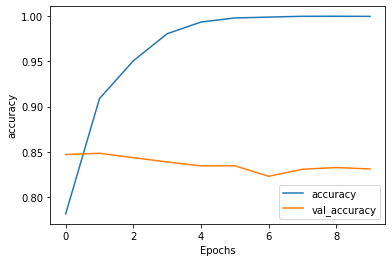

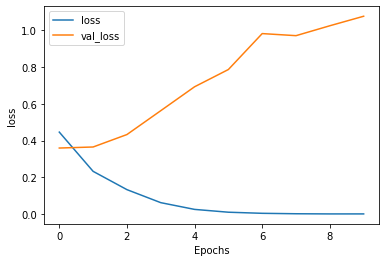

In [14]:
import matplotlib.pyplot as plt

#Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')